# Introdução à Distribuição Beta

Este notebook apresenta a distribuição Beta, sua intuição, propriedades e um exemplo prático com simulação em Python.

## Definição

A distribuição Beta é uma distribuição contínua definida no intervalo [0,1]. Sua densidade é:

\[ f(\theta; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \]

- \( \alpha \): parâmetro relacionado a "sucessos"
- \( \beta \): parâmetro relacionado a "fracassos"
- \( B(\alpha, \beta) \): constante de normalização

## Propriedades

- Suporte: \( \theta \in (0, 1) \)
- Média: \( \mathbb{E}[\theta] = \frac{\alpha}{\alpha + \beta} \)
- Variância: \( \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} \)

## Exemplo: Estimar probabilidade de sucesso

Suponha que observamos 8 sucessos e 2 fracassos. Vamos modelar \( \theta \) com uma Beta(9, 3).

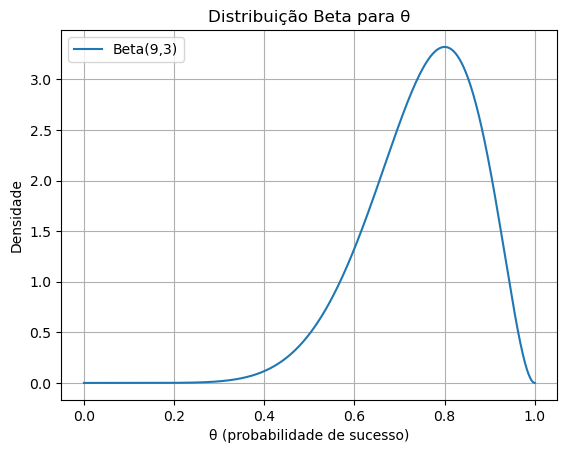

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parâmetros da distribuição Beta
alpha = 8 + 1
beta_param = 2 + 1

# Valores de theta
theta = np.linspace(0, 1, 500)
pdf = beta.pdf(theta, alpha, beta_param)

# Gráfico
plt.plot(theta, pdf, label=f'Beta({alpha},{beta_param})')
plt.title('Distribuição Beta para θ')
plt.xlabel('θ (probabilidade de sucesso)')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()

## Estatísticas da distribuição

In [2]:
mean = alpha / (alpha + beta_param)
var = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
print(f"Média: {mean:.3f}")
print(f"Variância: {var:.4f}")

Média: 0.750
Variância: 0.0144


## Conexão com Inferência Bayesiana

A distribuição Beta é comumente usada como distribuição a priori para proporções em modelos com dados binários (como o modelo binomial). Após observar os dados, a distribuição a posteriori continua sendo uma Beta (família conjugada).

## Exercício Proposto

Suponha que em uma pesquisa com 20 indivíduos, 14 responderam positivamente a uma pergunta binária (sucesso). Assuma uma distribuição a priori Beta(2,2).

1. Calcule os parâmetros da distribuição a posteriori.
2. Plote a densidade da posteriori usando `scipy.stats.beta.pdf`.
3. Calcule a média e o intervalo de credibilidade de 95%.
4. Interprete os resultados no contexto da pesquisa.

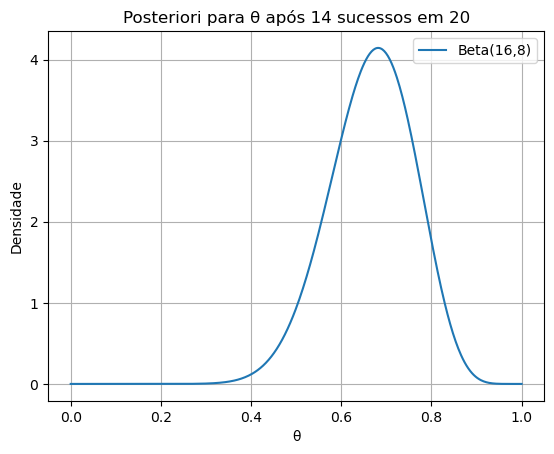

Média da posteriori: 0.667
Intervalo de 95%: (0.471, 0.836)


In [3]:
# Solução do exercício
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Dados
sucessos = 14
fracassos = 6
alpha_prior = 2
beta_prior = 2

# Posteriori
alpha_post = alpha_prior + sucessos
beta_post = beta_prior + fracassos

# Média e intervalo
media = alpha_post / (alpha_post + beta_post)
intervalo = beta.ppf([0.025, 0.975], alpha_post, beta_post)

# Plot
x = np.linspace(0, 1, 500)
plt.plot(x, beta.pdf(x, alpha_post, beta_post), label=f'Beta({alpha_post},{beta_post})')
plt.title('Posteriori para θ após 14 sucessos em 20')
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()

print(f"Média da posteriori: {media:.3f}")
print(f"Intervalo de 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")